In [16]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [18]:
print(str(train.shape))

(42000, 785)


In [19]:
from sklearn.model_selection import train_test_split 
train, valid =  train_test_split(train, train_size=0.98 , random_state=42 )

In [20]:
print ( "valid shape is :" + str(valid.shape) +  "   train shape is :" + str(train.shape) )

valid shape is :(840, 785)   train shape is :(41160, 785)


In [21]:
train_y = train['label'].astype('float32')
train_x = train.drop(['label'], axis = 1).astype('int32')

valid_y = valid['label'].astype('float32')
valid_x = valid.drop(['label'], axis = 1).astype('int32')

test_x  = test.astype('float32')

train_y.shape , train_x.shape , test_x.shape  ,valid_y.shape , valid_x.shape

((41160,), (41160, 784), (28000, 784), (840,), (840, 784))

In [22]:
valid_x = valid_x.values.reshape(-1, 28, 28, 1)
train_x = train_x.values.reshape(-1, 28, 28, 1)
test_x = test_x.values.reshape(-1, 28, 28, 1)
 
print ( "  ss x valid :" + str(valid_x.shape) )

train_x = train_x / 255.0
valid_x = valid_x / 255.0
test_x  = test_x  / 255.0

print ( "   Y train :" + str(train_y.shape) )
print ( "   x train :" + str(train_x.shape) )
print ( "   Y valid :" + str(valid_y.shape) )
print ( "   x valid :" + str(valid_x.shape) )


  ss x valid :(840, 28, 28, 1)
   Y train :(41160,)
   x train :(41160, 28, 28, 1)
   Y valid :(840,)
   x valid :(840, 28, 28, 1)


In [23]:
train_y = tf.keras.utils.to_categorical(train_y, 10) 
valid_y = tf.keras.utils.to_categorical(valid_y, 10) 


In [24]:
print(train_y[0:5,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
def convolutional_model(input_shape):
    """
    leenet-5 implementation
    """

    input_img = tf.keras.Input(shape=input_shape)
    '''The input for LeNet-5 is a 28x28 grayscale image which passes through the first convolutional layer with
    6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6 same conv '''
    x =tf.keras.layers.Conv2D(6, (5,5), strides=(1, 1), padding='same')(input_img)
    x = tf.keras.layers.ReLU()(x)
    '''Then the LeNet-5 applies average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. 
    The resulting image dimensions will be reduced to 14x14x6'''
    x = tf.keras.layers.AveragePooling2D( pool_size=(2, 2), strides=(2,2), padding='valid')(x)
    '''Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. In this layer,
    only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer as shown below.'''
    x = tf.keras.layers.Conv2D(16, (5,5), strides=(1, 1), padding='valid')(x)
    x = tf.keras.layers.ReLU()(x)   # in the paper he usedd alwways the tanh but we wwill try first the reLu
    '''The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. This layer is the 
    same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.'''
    x = tf.keras.layers.AveragePooling2D( pool_size=(2, 2), strides=(2,2), padding='valid')(x)
    # he used a conv layer herea also before the flaten but we will try to use it with inly the flatten
    """The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the
    120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4."""
    x = tf.keras.layers.Flatten()(x)    
    x = tf.keras.layers.Dense(units=40, activation='relu' ,kernel_regularizer= tf.keras.regularizers.l1(0.05))(x)
    x = tf.keras.layers.Dense(units=6, activation='relu',kernel_regularizer= tf.keras.regularizers.l1(0.05))(x)
    tf.keras.layers.Dropout(0.2)
  
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)  #10 bec we hace Classifier of 10 classes

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [26]:
conv_model = convolutional_model((28,28,1))

In [27]:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0     

In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(64)
test_dataset =  tf.data.Dataset.from_tensor_slices((valid_x, valid_y)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
644/644 [==============================] - 24s 35ms/step - loss: 5.0981 - accuracy: 0.5355 - val_loss: 1.2644 - val_accuracy: 0.7595
Epoch 2/100
644/644 [==============================] - 22s 34ms/step - loss: 1.1871 - accuracy: 0.7650 - val_loss: 1.0708 - val_accuracy: 0.8036
Epoch 3/100
644/644 [==============================] - 22s 34ms/step - loss: 1.0438 - accuracy: 0.7973 - val_loss: 0.9632 - val_accuracy: 0.8179
Epoch 4/100
644/644 [==============================] - 22s 34ms/step - loss: 0.9405 - accuracy: 0.8205 - val_loss: 0.8818 - val_accuracy: 0.8238
Epoch 5/100
644/644 [==============================] - 22s 34ms/step - loss: 0.8475 - accuracy: 0.8430 - val_loss: 0.8061 - val_accuracy: 0.8631
Epoch 6/100
644/644 [==============================] - 22s 34ms/step - loss: 0.7696 - accuracy: 0.8683 - val_loss: 0.7139 - val_accuracy: 0.8964
Epoch 7/100
644/644 [==============================] - 22s 35ms/step - loss: 0.7084 - accuracy: 0.8867 - val_loss: 0.6765 - val_ac

In [29]:
history.history

{'accuracy': [0.5355198979377747,
  0.7649902701377869,
  0.7972789406776428,
  0.8205053210258484,
  0.8430029153823853,
  0.8682944774627686,
  0.8866860866546631,
  0.8985179662704468,
  0.9060009717941284,
  0.9116618037223816,
  0.9150388836860657,
  0.9175655841827393,
  0.9191204905509949,
  0.9201894998550415,
  0.9217200875282288,
  0.9227162003517151,
  0.9239310026168823,
  0.9254615902900696,
  0.9270408153533936,
  0.9282069802284241,
  0.929397463798523,
  0.9304664731025696,
  0.9307823181152344,
  0.9315354824066162,
  0.9323615431785583,
  0.9324830174446106,
  0.9327016472816467,
  0.9331632852554321,
  0.9334062337875366,
  0.9342565536499023,
  0.9341350793838501,
  0.9345238208770752,
  0.9353498816490173,
  0.9351068735122681,
  0.9350582957267761,
  0.935762882232666,
  0.9362002015113831,
  0.9372934699058533,
  0.9379494786262512,
  0.938095211982727,
  0.938265323638916,
  0.9390184879302979,
  0.9395529627799988,
  0.94016033411026,
  0.9405247569084167,
  0.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

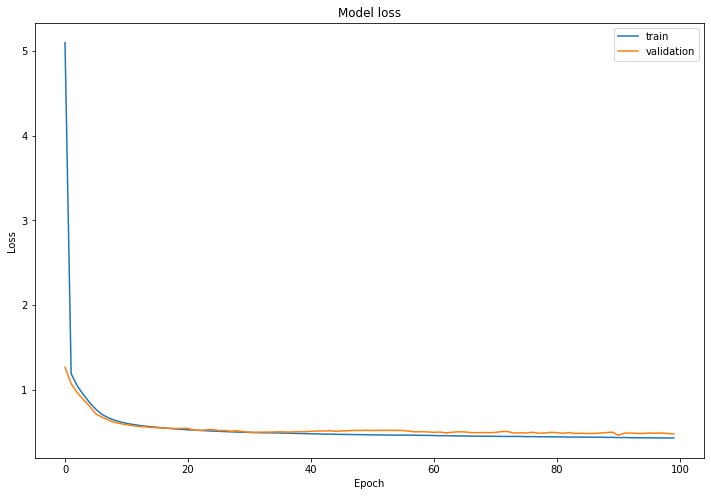

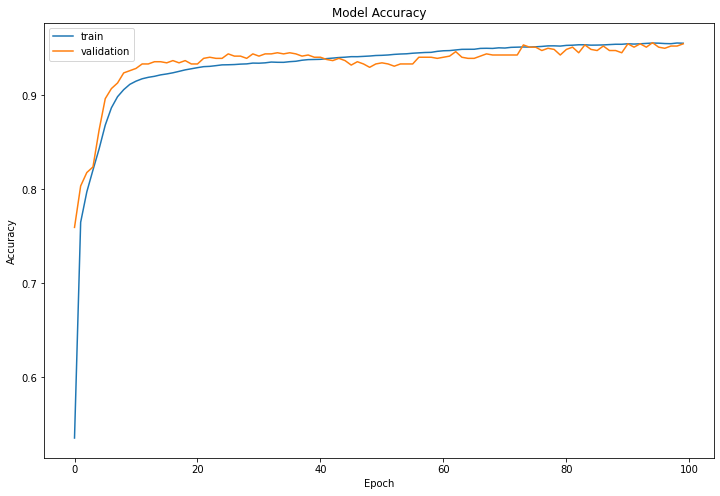

In [30]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')